# Tienda en Línea: Lanza un test A/B

# Descripción del Proyecto

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Descripción de datos

Para desarrollar el proyecto se cuenta con los siguientes datasets para cada parte:

A. Primera Parte

Tabla "Hipotheses"
- Hypotheses
- Reach
- Impact
- Confidence
- Effort

B. Segunda Parte

Tabla "Orders"
- transactionID
- visitorID
- date
- revenue
- group

Tabla "Visits"
- date
- group
- visits

# Preproceso de Datos

## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt

## Carga de Datos

In [2]:
hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=';')
orders = pd.read_csv("/datasets/orders_us.csv")
visitors = pd.read_csv("/datasets/visits_us.csv")

hypotheses.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (tota

## Revisión de Datos (duplicados, nulos, tipo de datos)

### Tabla "Hyphotheses"

In [3]:
#Visualización de algunos datos del dataframe
hypotheses.head(5)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
#nombres de las columnas a minusculas
hypotheses.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']

In [5]:
#validacion de nulos y duplicados
print('Validación de valores nulos:')
print(hypotheses.isna().sum())
print()
print('Número de duplicados: ', hypotheses.duplicated().sum())

Validación de valores nulos:
hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

Número de duplicados:  0


### Tabla "Orders"

In [6]:
#Visualización de algunos datos del dataframe
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
#aplicamos snake case para algunos nombres de columnas
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [8]:
#validacion de nulos y duplicados
print('Validación de valores nulos:')
print(orders.isna().sum())
print()
print('Número de duplicados: ', orders.duplicated().sum())

Validación de valores nulos:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Número de duplicados:  0


### Tabla "Visitors"

In [9]:
#Visualización de algunos datos del dataframe
visitors.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
#validacion de nulos y duplicados
print('Validación de valores nulos:')
print(visitors.isna().sum())
print()
print('Número de duplicados: ', visitors.duplicated().sum())

Validación de valores nulos:
date      0
group     0
visits    0
dtype: int64

Número de duplicados:  0


# Desarrollo del Proyecto

## Priorizar Hipótesis

### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [11]:
#Visualizamos datos del dataframe
hypotheses.head(5)

#Creamos la columna con el ratio "ice"
hypotheses['ice'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

#Ordenamos el dataframe según lo especificado
hypotheses.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [12]:
#Visualizamos datos del dataframe
hypotheses.head(5)

#Creamos la columna con el ratio "rice"
hypotheses['rice'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

#Ordenamos el dataframe según lo especificado
hypotheses.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

<bound method NDFrame.head of                                           hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort        ice   rice  n_hypothesis  
0           8       6  13.333333   40.0             1  
1           4      10   2.000000    4.0             2  
2           7       3   7.000000   56.0             3  
3           3       8   1.125000   

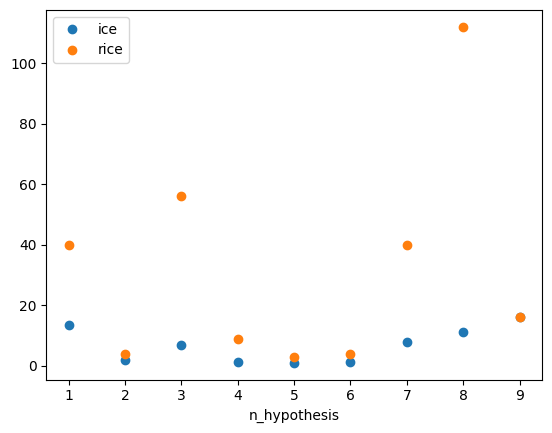

In [13]:
#Ennumeramos las hipotesis para hacer una gráfica comparativa
hypotheses['n_hypothesis'] = hypotheses.index+1

print(hypotheses.head)

#Grafica que permite comparar la priorización de hipotesis usando el método RICE vs ICE.
hypotheses.plot(x='n_hypothesis', y= ['ice', 'rice'], style='o')
plt.show()

La diferencia entre los dos métodos es la inclusión del parámetro "reach" o alcance, lo cual incluye en la ecuación la cantidad de usuarios afectados por la hipótesis planteada.
Al priorizar las hipótesis usando el método ICE, se observa que en el TOP 3, de mayor a menor, se encuentran las hipótesis 9, 1 y 8. Sin embargo, al usar el método RICE, es decir, mantener todos los parámetros pero incluyendo adicionalmente el parámetro "reach" el orden de prioridades cambia, siendo el TOP 3, de mayor a menor, las hipótesis 8, 3 y 1.

Con lo que se concluye por ambos métodos, que tanto las hipótesis 8 y 1 deben ser las hipótesis a priorizar.

## Análisis de test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [14]:
# Encontramos los id de visitantes que se encuentran en ambos grupos
visitors_id_A = orders[orders['group'] == 'A']['visitor_id']
visitors_id_B= orders[orders['group'] == 'B']['visitor_id']

duplicated_visitors_id = pd.merge(visitors_id_A, visitors_id_B, how='inner')

duplicated_visitors_id.drop_duplicates(inplace=True)

# Quitamos del dataframe "orders" los id de visitantes que se encuentran en ambos grupos.
#print(orders.count())
orders.drop(orders[orders['visitor_id'].isin(duplicated_visitors_id['visitor_id'])].index, inplace = True)

orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [15]:
#Creamos una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date', 'group']].drop_duplicates()

#Preparamos la tabla para agrupar por visitantes, compradores, ingresos por grupo
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
                                                    ].agg({'date':'max',
                                                           'group':'max',
                                                           'transaction_id':pd.Series.nunique,
                                                           'visitor_id':pd.Series.nunique,
                                                           'revenue':'sum'}),
                                    axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
                                                    ].agg({'date':'max',
                                                           'group':'max',
                                                           'visits':'sum'}),
                                    axis=1).sort_values(by=['date','group'])


cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on=['date','group'],
                                        right_on=['date','group']
                                       )

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

#Creamos la tabla acumulativa de ingresos por grupo
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

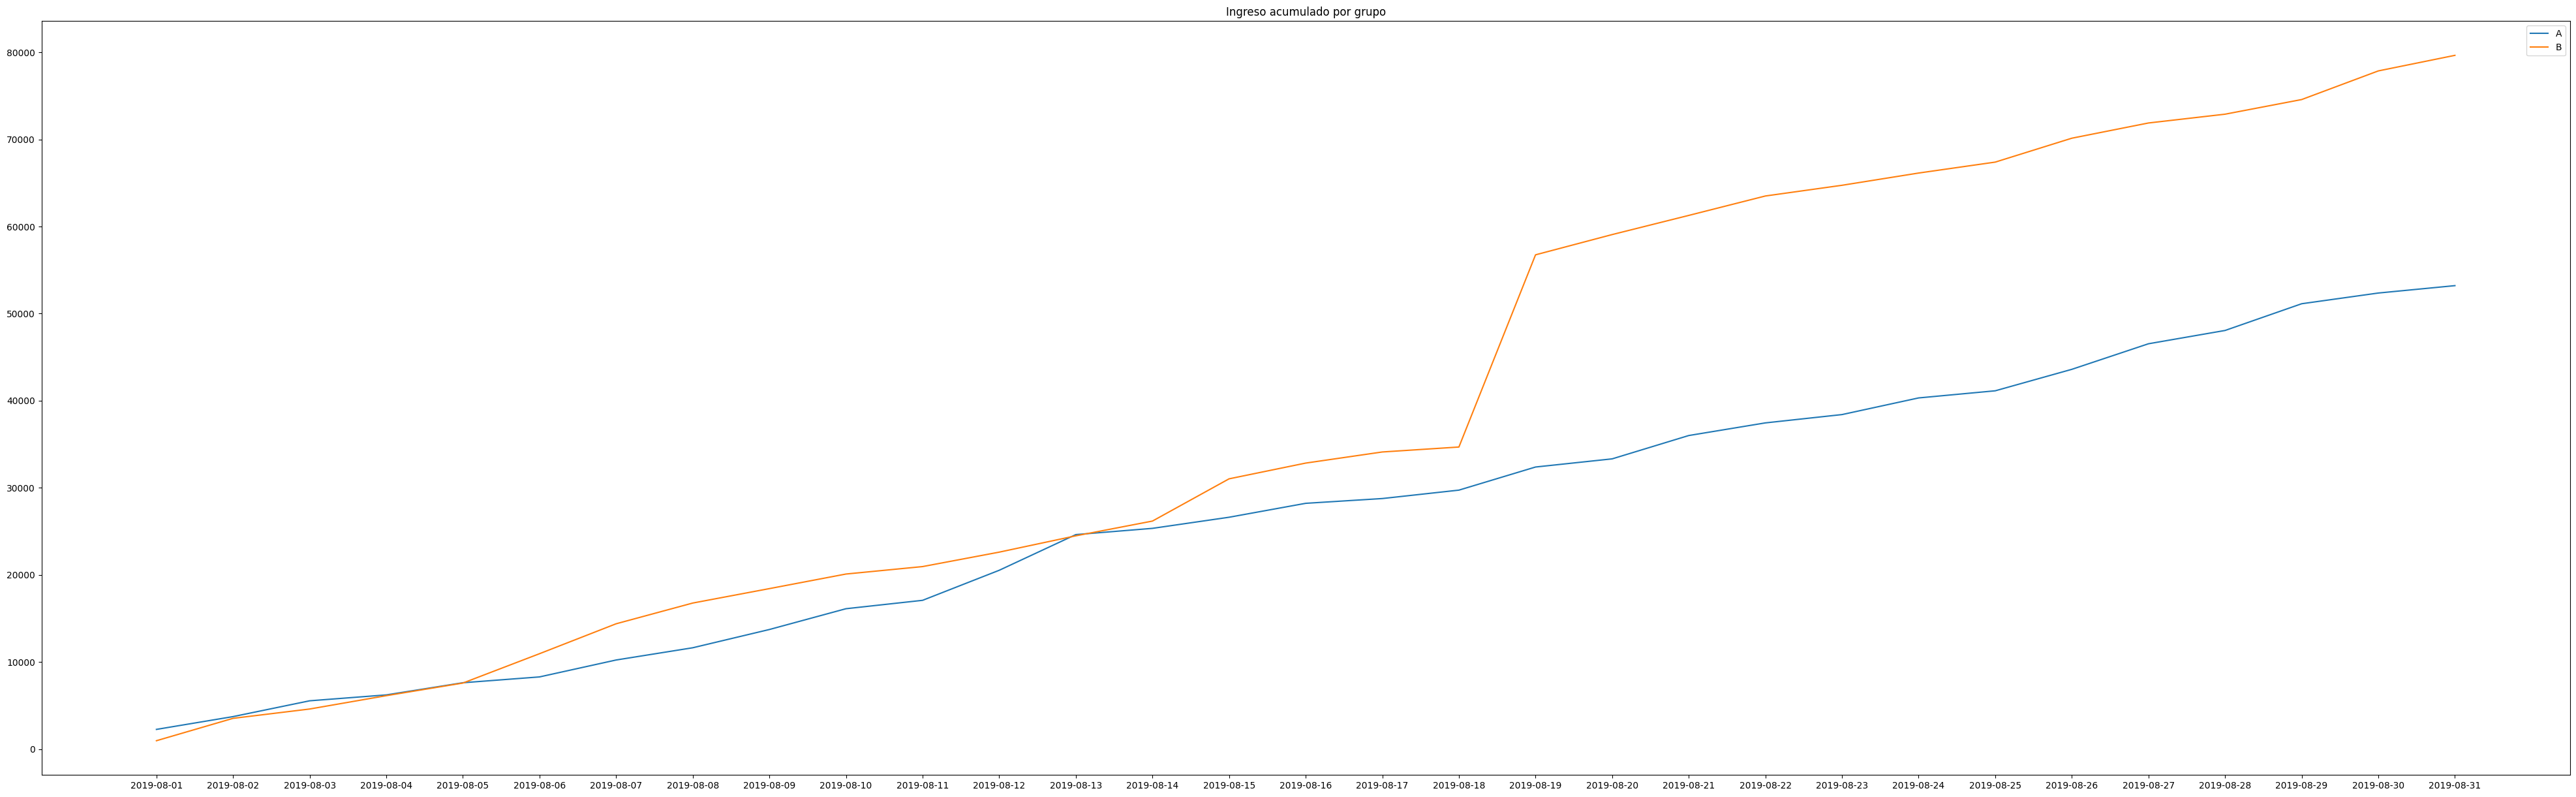

In [16]:
#Graficamos los ingresos por día para cada grupo
fig, test = plt.subplots()

test.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'],label='A')

test.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],label='B')

test.set_title('Ingreso acumulado por grupo')
fig.set_figheight(15)# altura (height)
fig.set_figwidth(50) # anchura (width)

test.legend()

Se observa que los ingresos crecen constantemente durante toda la prueba, y además se ve una tendencia donde los ingresos del grupo B incrementan en mayor manera que los del grupo A, a partir de un punto del día 13 de la prueba.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

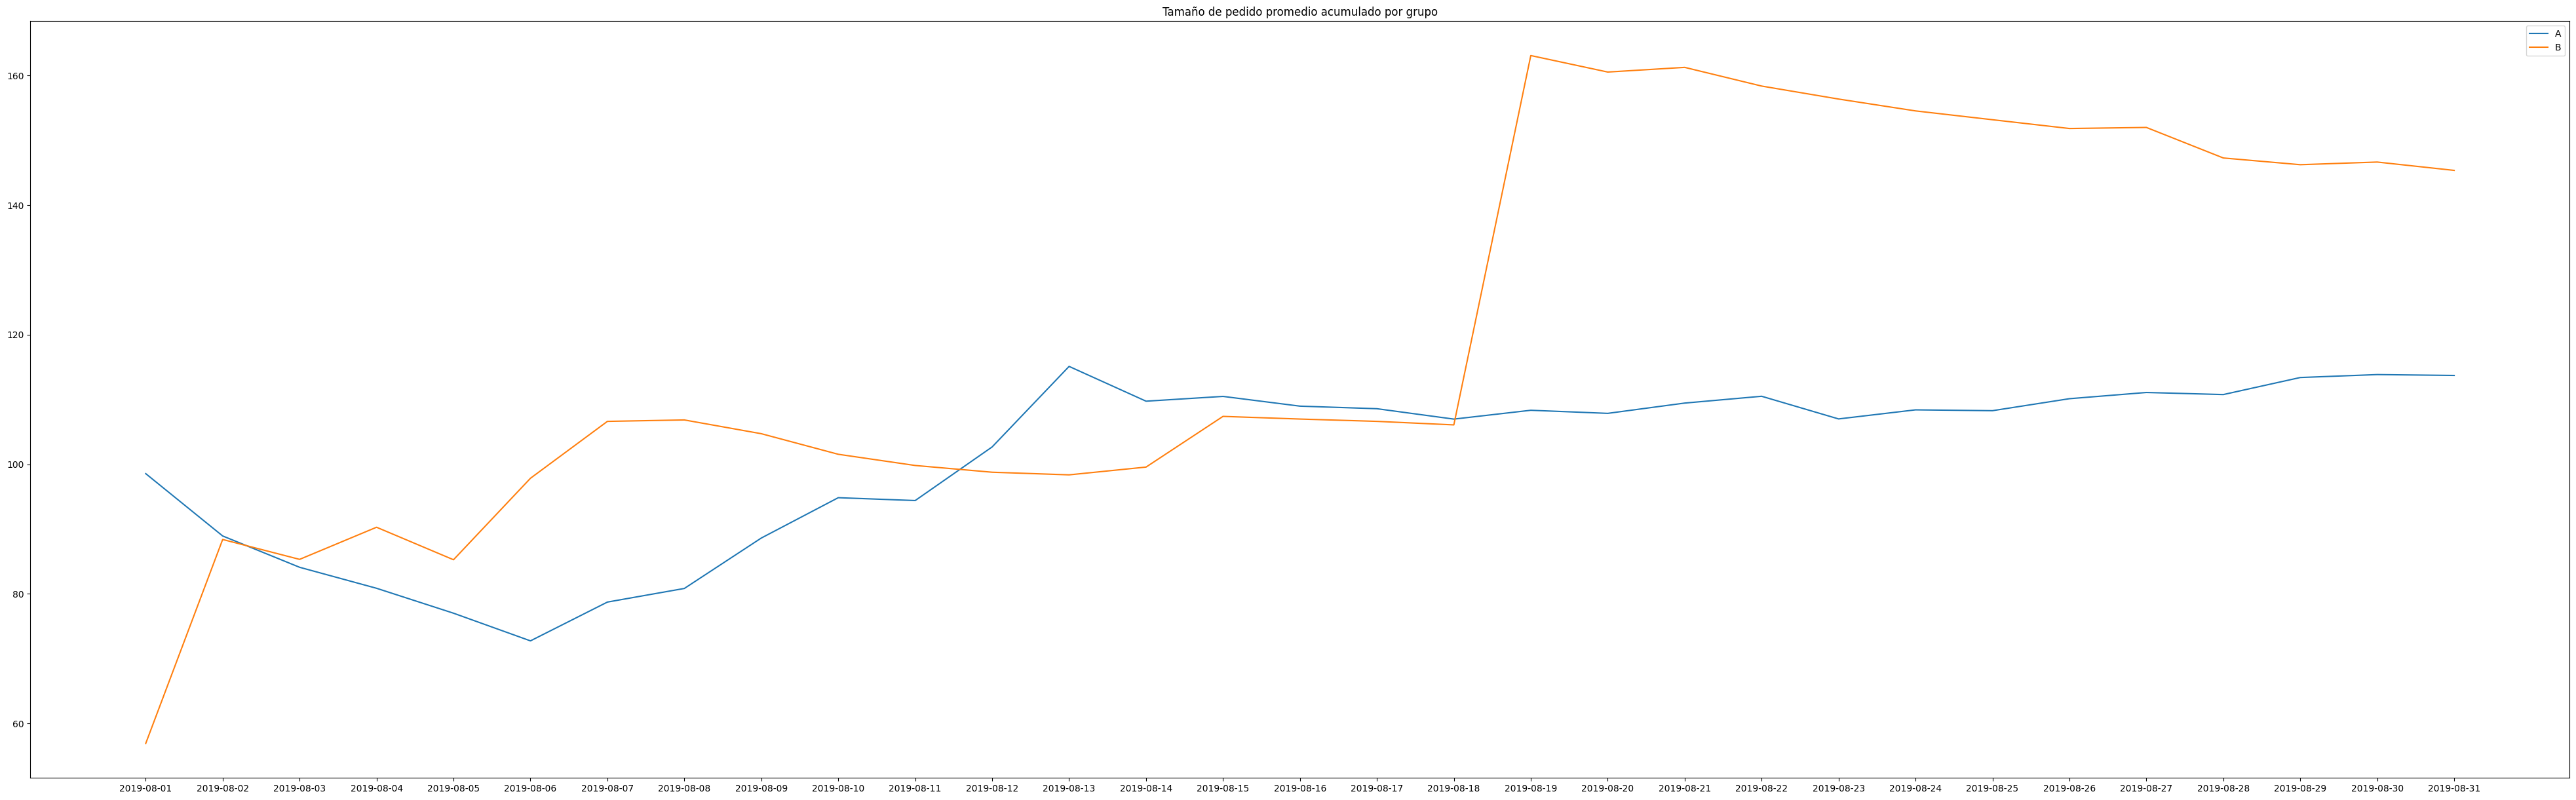

In [17]:
#Creamos la tabla acumulativa del tamaño de pedido promedio por grupo
fig, test = plt.subplots()

test.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
test.plot(cumulativeRevenueA['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

test.set_title('Tamaño de pedido promedio acumulado por grupo')
fig.set_figheight(15)# altura (height)
fig.set_figwidth(50) # anchura (width)

test.legend()

Se observa que el tamaño de compra empieza a estabilizarse hacia al final de la prueba; sin embargo, necesitaremos más datos para ambos grupos para poder definir el verdadero tamaño promedio de compra por cada grupo.

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

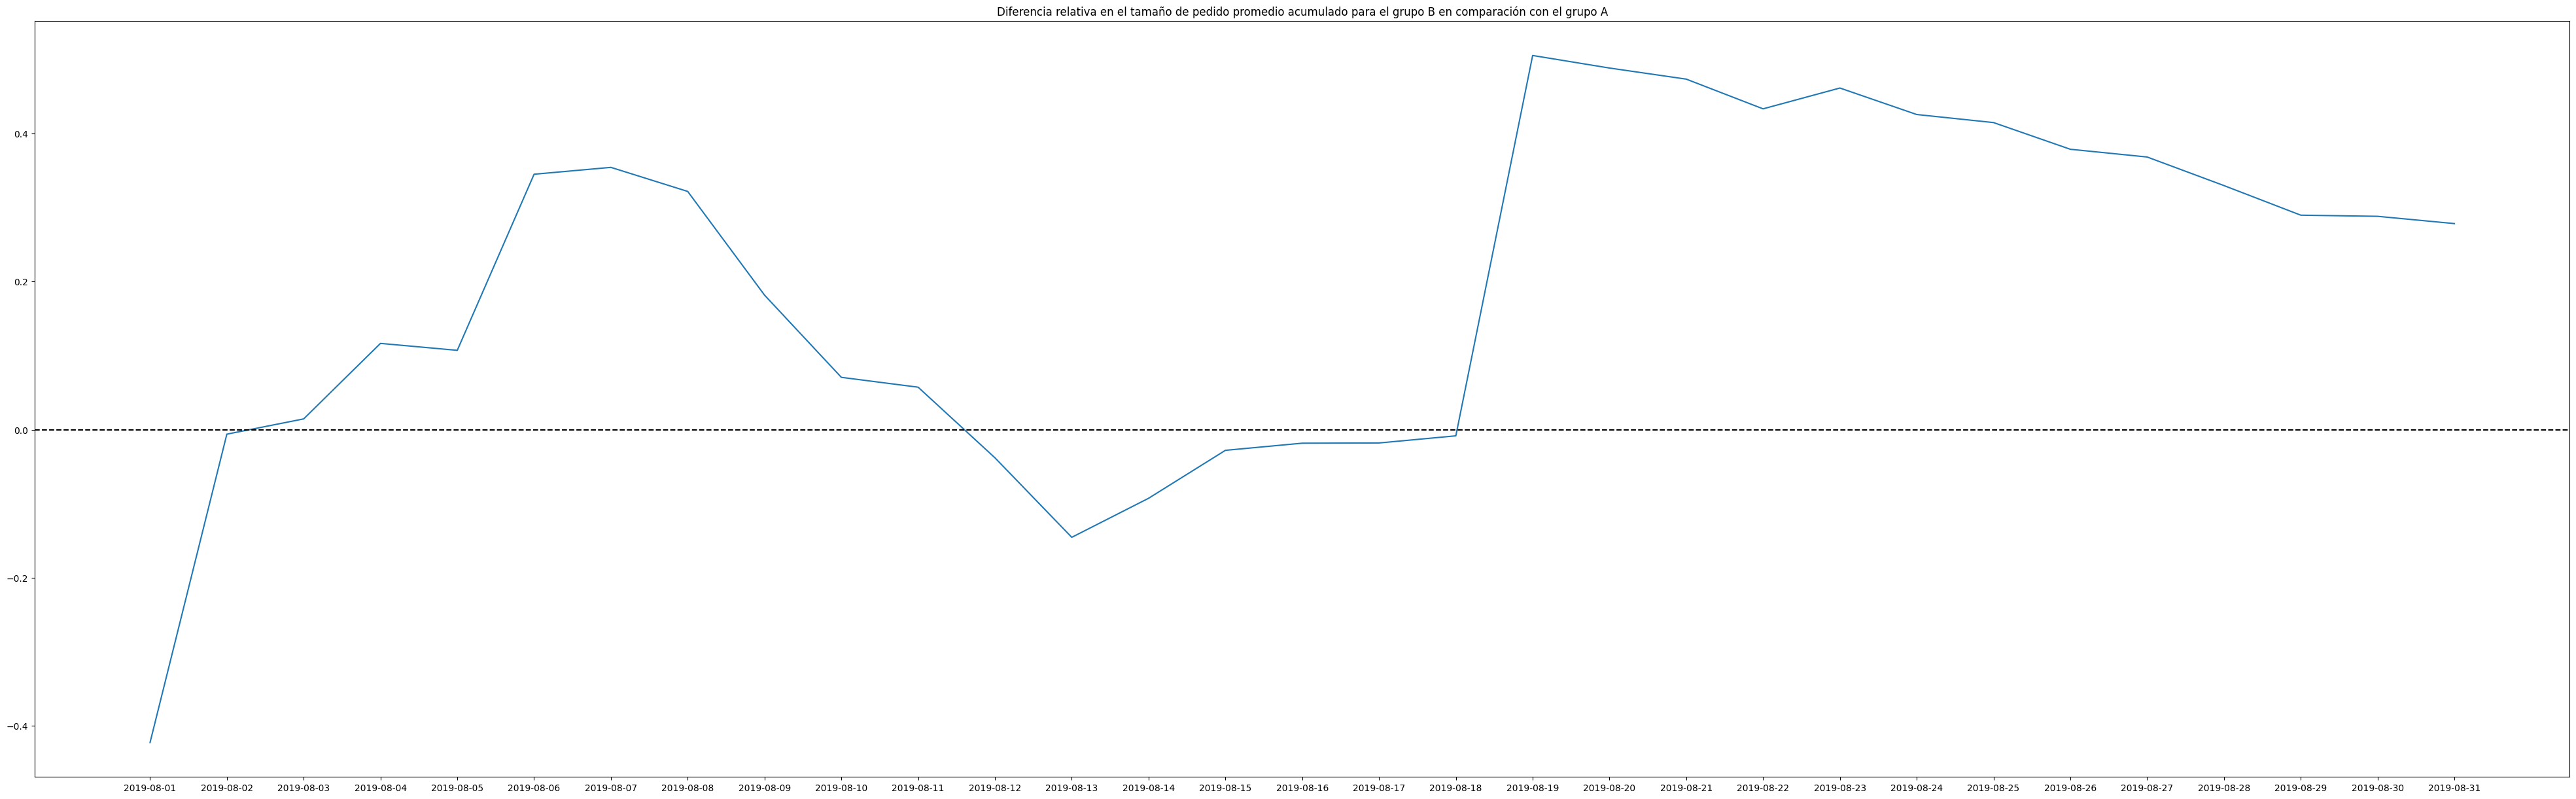

In [18]:
#Creamos un dataframe para poder graficar la diferencia relativa en el tamaño de pedido promedio acumulado entre los grupos
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Creamos el gráfico de diferencia relativa para los tamaños de compra promedio entre grupos
fig, test = plt.subplots()
test.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

test.set_title('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A')
fig.set_figheight(15)# altura (height)
fig.set_figwidth(50) # anchura (width)

#Agregamos un eje X de referencia
test.axhline(y=0, color='black', linestyle='--')

Se observa que en varios puntos hay una diferencia entre los segmentos. Lo cual nos indica que podrían haber pedidos de volúmenes altos y atípicos.

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

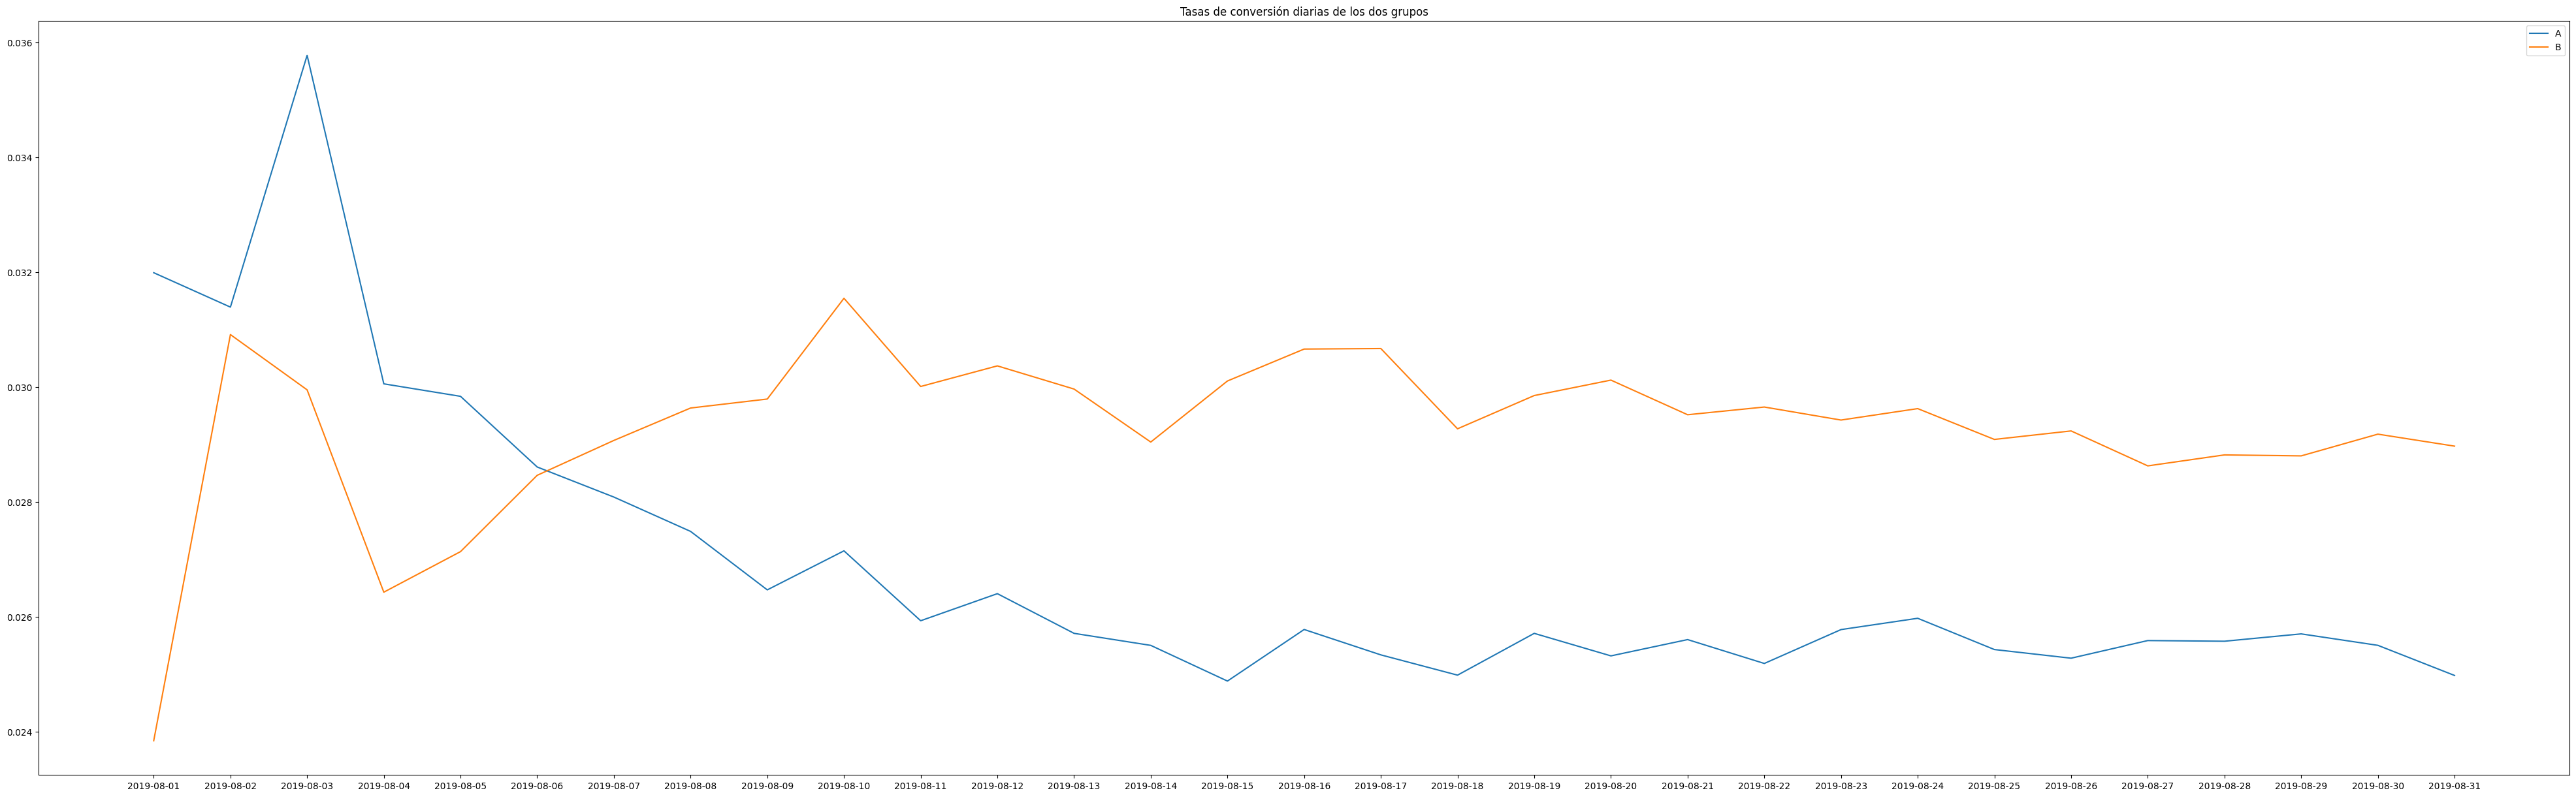

In [19]:
#Calculamos la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#Seleccionamos los datos del grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#Seleccionamos los datos del grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Gráficamos
fig, test = plt.subplots()
test.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
test.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

test.set_title('Tasas de conversión diarias de los dos grupos')
fig.set_figheight(15)# altura (height)
fig.set_figwidth(50) # anchura (width)

test.legend()

Al inicio de la prueba se observa que la tasa de conversión de ambos grupos empiezan a un ritmo similar; sin embargo, en un punto el grupo B despega y su tasa de conversión crece constantemente hasta estabilizarse, lo mismo sucede con el grupo A.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


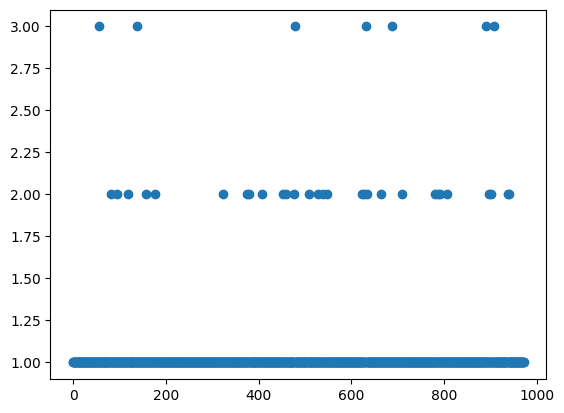

In [20]:
#Creamos un dataframe a partir de "orders" donde visualicemos la cantidad de ordenes realizadas por usuario
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Se observa que hay varios usuarios que han realizado entre 2 a 3 pedidos. No se puede disernir si son valores atípicos o son compras regulares.

### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [21]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))


[1. 1. 2.]


Según el ejercicio no más del 5% de usuarios realizaron más de 1 pedido y el 10% realizó 1 pedido.
Lo que sugiere que el umbral de 1 pedido por usuario sería el límite máximo para considerar un comportamiento normal y ese sería el filtro a usar para ubicar anomalías.

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

     transaction_id  revenue
143       590470918  19920.4
939      3936777065   3120.1
161       666610489   1425.8
875      3668308183   1335.6
850      3603576309   1050.0
311      1348774318   1025.8
71        316924019   1015.9
310      1347999392    930.0
585      2420050534    905.8
738      3163614039    830.3


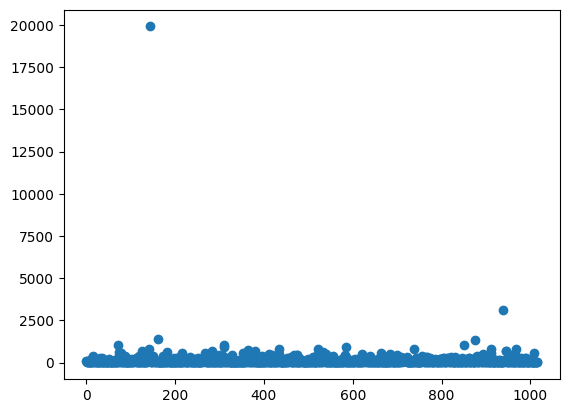

In [22]:
#Creamos un dataframe a partir de "orders" donde visualicemos solo los precios de cada pedido
revenueByOrder = (
    orders.drop(['group', 'visitor_id', 'date'], axis=1)
    .groupby('transaction_id', as_index=False)
    .agg({'revenue': 'sum'})
)

revenueByOrder.columns = ['transaction_id', 'revenue']

print(revenueByOrder.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0,len(revenueByOrder)))

plt.scatter(x_values, revenueByOrder['revenue'])

En la gráfica de dispersión se observa que el ingreso de pedido se encuentra concentrado en montos menores a 2,500. Existiendo un par de anomalías súper puntuales.

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [23]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


El ejercicio de percentiles nos indica que menos del 5% de pedidos no pasaron de 415. Y el 10% de pedidos fueron por montos no mayores a 281. Esto nos indica que un umbral de valor a considerar como límite máximo para un pedido regular sería 450 (considerando un monto redondo), por lo que valores encima de ello sería considerados valores anómalos.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [24]:
ordersByUsersA = (orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique}))
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0,)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01102
0.160


El valor de p (0.01) es menor a 0.05 por lo que rechazamos la hipótesis nula.
Por otro lado, el análisis de datos sin procesar nos indica que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 16.0%.


### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [25]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


El valor p es superior a 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. Por otro lado, la diferencia relativa es del 27.8%. Nos indica que el tamaño promedio de pedido del grupo B es mayor al A; sin embargo, podría estar afectado por valores atípicos de compra ya que estamos evaluando los datos en bruto.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [26]:
#Antes de encontrar la significancia estadística, debemos ubicar los datos anómalos para poder filtrarlos.
#Para ello, según lo que vimos en ejercicios previos, se identifico que pedidos mayores a 1 y montos mayores a 450 serían considerados como anómalos.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>1]['visitor_id'], ordersByUsersB[ordersByUsersB['orders']>1]['visitor_id']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue']> 450]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

#Imprimimos un par de filas de los datos considerados como anómalos.
abnormalUsers.head(5)


1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitor_id, dtype: int64

In [27]:
#Encontramos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum()-len(ordersByUsersA['orders'])), name='orders',),], axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum()-len(ordersByUsersB['orders'])), name='orders',),], axis=0,)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01244
0.180


Igual que con los datos sin procesar (ejercicio 5.9 del proyecto), hemos alcanzado el nivel de significación.
El grupo B es mucho mejor que el grupo A.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.881
-0.009


El valor de p aumentó por lo que reafirma que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. Sin embargo, ahora la diferencia entre los grupos es del 0.9% en lugar del 27.8%. Esto significa que el grupo B no está trayendo más ingresos.

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

Conclusiones de la prueba:

- Existe una diferencia estadísticamente significativa en la conversión entre los grupos considerando los datos en bruto así como en los filtrados.
- Respecto a la conversión entre los tamaños promedio de compra, en el primer análisis considerando los datos en bruto no se observó una diferencia estadísticamente significativa; y al considerar los datos filtrados se reafirmo la conclusión inicial.

- El gráfico que muestra la diferencia de conversión entre los grupos nos indica que los resultados del grupo B son mejores que los del grupo A, y tienen una tendencia a crecer.

- El gráfico que muestra la diferencia en el tamaño promedio de los pedidos entre los grupos nos indica que los resultados del grupo B van mejorando cada día hasta el día 19 de la prueba; sin embargo, a partir de ese punto los resultados del grupo B van cayendo paulatinamente y se van estabilizando hacia el final de la prueba.

Por lo mencionado se concluye que las iniciativas del equipo de marketing no generaron el impacto esperado de traer mayores ingresos. Para la prueba se concluyé que no hay diferencia entre los grupos (opción 2).